## 1. Imports

Import the libraries to process the data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
from math import prod
import os

## 2. Read Data

Read in the data for each test result.

In [30]:
# The data is stored in a 5XX.csv for the serial tests, and 6XX.csv for the parallel tests
# The data files are in the `/data` folder

DIRECTORY = "data/page-tracking-test"

# Check if the data is loaded
# If not, load it
if 'all_data' in locals():
    print("Data already loaded")
else:
    # A structure for storing the data
    all_data = {}

    for i in range(500, 600):
        if os.path.isfile(f"{DIRECTORY}/{i}.csv"):
            all_data[i] = pd.read_csv(f"{DIRECTORY}/{i}.csv")
            print(f"Loaded data for test {i}")

Data already loaded


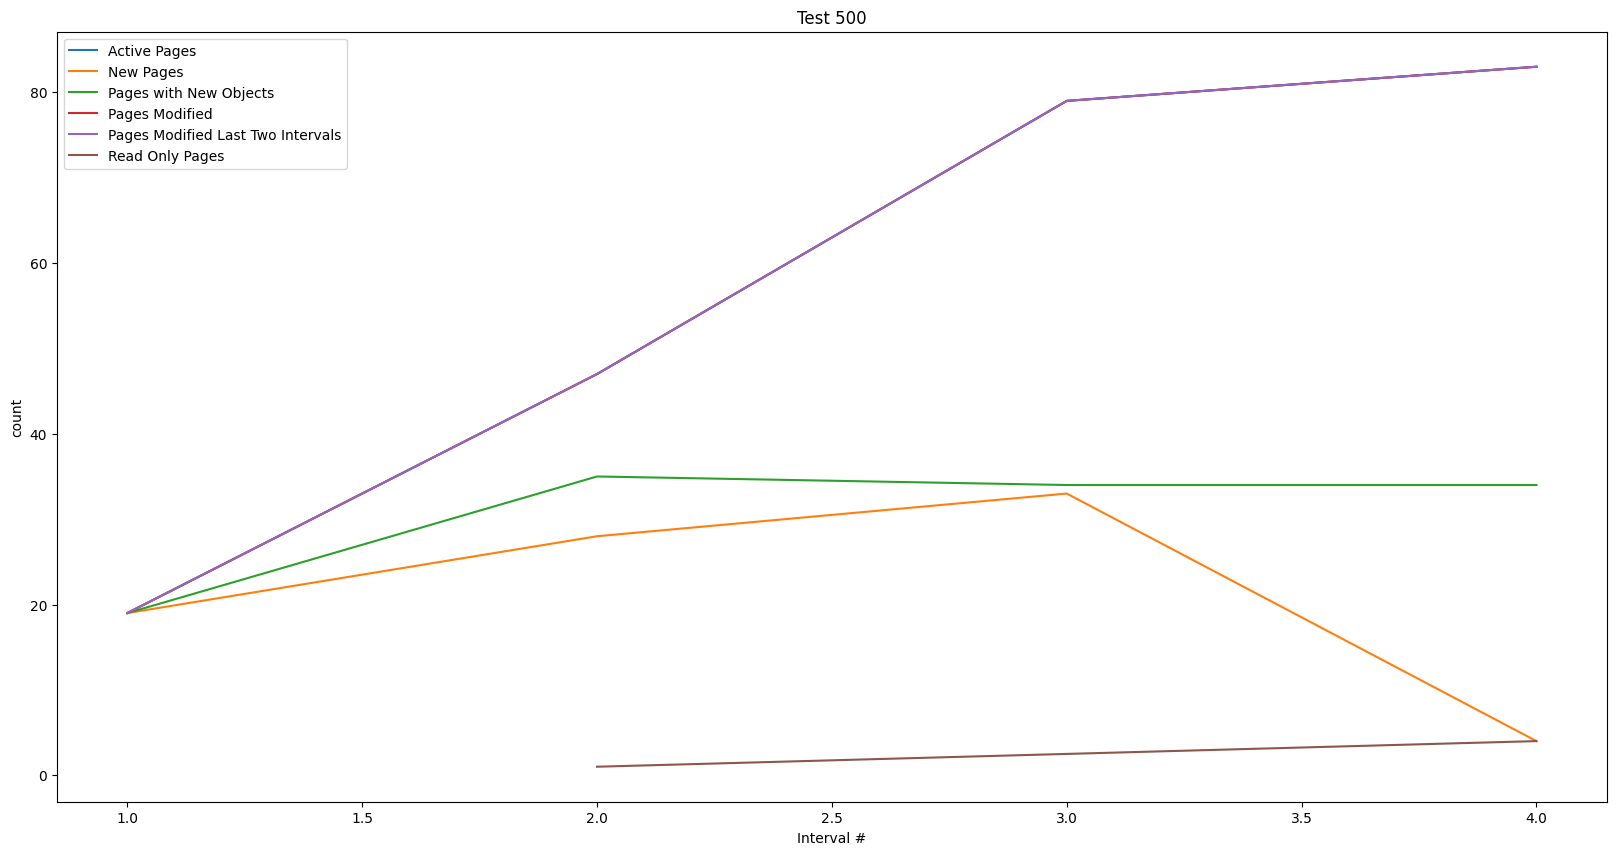

In [39]:
# Show a line graph with a line for:
# Number of active pages (for each interval)
# New pages (for each interval)
# Pages with new objects
# Pages modified
# Pages that have been modified for either of the last two intervals
# Pages that have only been initialized, then not modified

for test in all_data:
    # The data for the test
    test_data = all_data[test]

    plt.figure(figsize=(20,10))
    plt.title(f"Test {test}")
    # Show the number of active pages

    # Sum the entries for each interval
    active_pages = test_data["Interval #"].value_counts().sort_index()

    # The number of new pages
    new_pages = test_data["Interval #"][test_data["Is New Page?"]].value_counts().sort_index()

    # The number of pages with new objects
    new_objects = test_data["Interval #"][test_data["Has New Objects?"]].value_counts().sort_index()

    # The number of pages modified this interval
    modified_pages = test_data["Interval #"][test_data["Modified This Interval?"]].value_counts().sort_index()

    # The number of pages modified in the last two intervals
    modified_last_two = test_data["Interval #"][test_data["Modified This Interval?"] | test_data["Modified Last Interval?"]].value_counts().sort_index()

    # The number of pages that have only been initialized, then not modified
    # This is only the pages that ONLY EVER have `Write Count` of 1

    # Get all the pages that only ever have a `Write Count` of 1
    read_only = test_data.groupby("Physical Page Address").filter(lambda x: (x['Write Count'] != 2).all())
    # Get the read only pages back into a series
    read_only = read_only["Interval #"].value_counts().sort_index()

    # Plot the data
    # plt.plot(active_pages, label="Active Pages")
    # print(active_pages)
    # plt.plot(new_pages, label="New Pages")
    # plt.plot(new_objects, label="Pages with New Objects")
    # plt.plot(modified_pages, label="Pages Modified")
    # plt.plot(modified_last_two, label="Pages Modified Last Two Intervals")
    # plt.plot(read_only, label="Read Only Pages")
    sns.lineplot(data=active_pages, label="Active Pages")
    sns.lineplot(data=new_pages, label="New Pages")
    sns.lineplot(data=new_objects, label="Pages with New Objects")
    sns.lineplot(data=modified_pages, label="Pages Modified")
    sns.lineplot(data=modified_last_two, label="Pages Modified Last Two Intervals")
    sns.lineplot(data=read_only, label="Read Only Pages")
    plt.xlabel("Interval #")

    plt.legend()
    plt.show()
